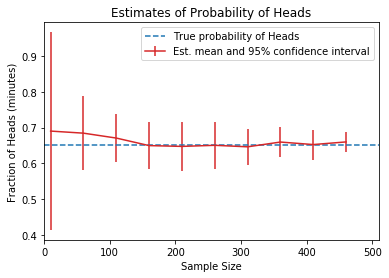

In [7]:
import pylab, random
random.seed(0)

######################
## Helper functions ##
######################
def flipCoin(numFlips):
    '''
    Returns the result of numFlips coin flips of a biased coin.

    numFlips (int): the number of times to flip the coin.

    returns: a list of length numFlips, where values are either 1 or 0,
    with 1 indicating Heads and 0 indicating Tails.
    '''
    with open('coin_flips.txt','r') as f:
        all_flips = f.read()
    flips = random.sample(all_flips, numFlips)
    return [int(flip == 'H') for flip in flips]


def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

    
#############################
## CLT Hands-on             #
##                          #
## Fill in the missing code #
## Do not use numpy/pylab   #
#############################
meanOfMeans, stdOfMeans = [], []
sampleSizes = range(10, 500, 50)

def clt():
    for sampleSize in sampleSizes:
        sampleMeans = []
        for t in range(20):
            sample = flipCoin(sampleSize)
            sampleMeans.append(getMeanAndStd(sample)[0])
        meanOfMeans.append(getMeanAndStd(sampleMeans)[0])
        stdOfMeans.append(getMeanAndStd(sampleMeans)[1])

clt()
pylab.figure(1)
yerr = 1.96*pylab.array(stdOfMeans)
label = 'Est. mean and 95% confidence interval'
pylab.errorbar(sampleSizes, meanOfMeans, yerr=yerr, label=label)
pylab.xlim(0, max(sampleSizes) + 50)
pylab.axhline(0.65, linestyle = '--',
              label = 'True probability of Heads')
pylab.title('Estimates of Probability of Heads')
pylab.xlabel('Sample Size')
pylab.ylabel('Fraction of Heads (minutes)')
pylab.legend(loc = 'best')
pylab.show()


